## Introduction
> The dataset contains over 4000 observation, with 17 columns, which includes age, job,marital, education, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome,yes_subscription
> age---customer age
> 
> job---customer employment status
> 
> marital-marital_status
> 
> education--customer qualification
> 
> default -- customer credit worth
> 
> balance-- customer account balance
> 
> housing -- housing loan plan
> 
> loan --- customer on loan
> 
> contact --type of contact
> 
> day-- Last contact day of the month (numeric).
> 
> month-- : Last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec").
> 
> duration-- call duration in seconds
> campaign-- crosselling product
> 
> pdays Number of days that passed by after the client was last contacted from a 
previous campaign (numeri,,' -'1 means client was not previousl  contacted)
.>• previous: Number of contacts performed before this campaign and for this cliet
(numer
c>
• poutcome: Outcome of the previous marketing campaign (categorial:
"unknown","other","fail
ure","succe
 syes_subscription: Has the client subscribed a term deposit? (binary: "yes","no")

### Objective
to  extract insight that can be use in making business decision by analysing customer behaviours, and subscription rate "
no").

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sb

In [178]:
bank_data=pd.read_csv("bank.csv")
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [179]:
bank_data.shape

(4521, 17)

In [182]:
bank_data['default'].value_counts()

default
no     4445
yes      76
Name: count, dtype: int64

1. subscription by marital status
2. subscription by employment rate
3. subscription by month
4. education
5. default -- forcus sales to non defaulter
6. duration
7. campaign-- number of time used for the product cross selling
8. pdays

In [185]:
bank_data.isna().sum().sum()

0

In [187]:
bank_data.duplicated().sum()

0

In [189]:
cat_col=bank_data.select_dtypes('object').columns
cat_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [191]:
for col in cat_col:
    print(col)
    print(bank_data[col].value_counts())

job
job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64
marital
marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64
education
education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64
default
default
no     4445
yes      76
Name: count, dtype: int64
housing
housing
yes    2559
no     1962
Name: count, dtype: int64
loan
loan
no     3830
yes     691
Name: count, dtype: int64
contact
contact
cellular     2896
unknown      1324
telephone     301
Name: count, dtype: int64
month
month
may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: count, dtype: int64
poutcome
poutcome
unknown    3705

In [193]:
num_col=bank_data.select_dtypes('number')

In [195]:
num_col

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0
...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0
4517,57,-3313,9,153,1,-1,0
4518,57,295,19,151,11,-1,0
4519,28,1137,6,129,4,211,3


In [197]:
def plot_hist(data):
    num_cols=data.columns
    for col in num_cols:
        plt.figure(figsize=(12,6))
        plt.subplot(222)
        plt.hist(data[str(col)])
        plt.title(f'Distribution of {str(col)}')
        plt.ylabel('frequency')


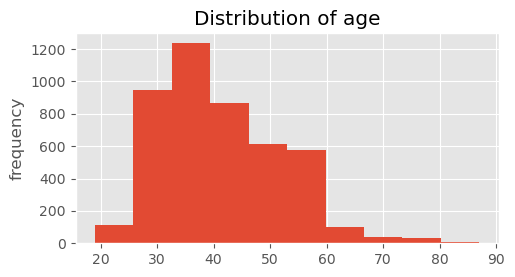

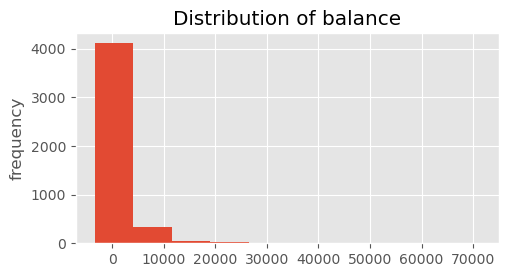

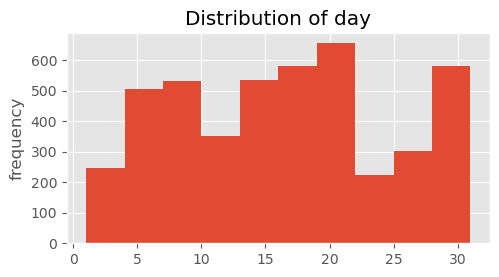

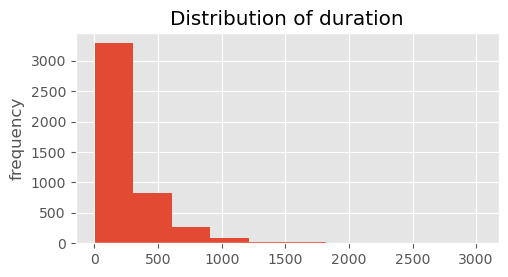

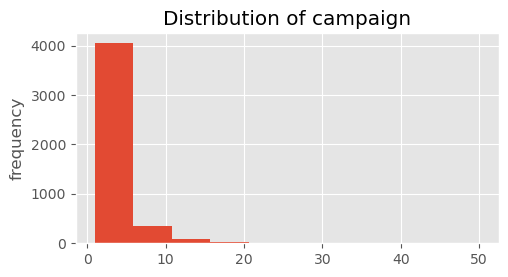

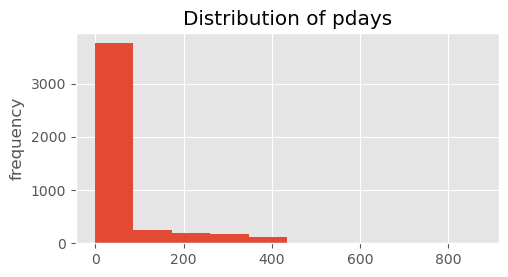

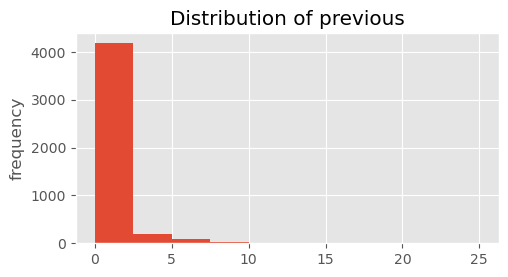

In [199]:
plot_hist(data=num_col)

In [201]:
num_col.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [203]:
# Does duration affect the subscription rate ie check subcription rate by duration
subscription_duration= bank_data.groupby('y')['duration'].mean()
subscription_duration

y
no     226.347500
yes    552.742802
Name: duration, dtype: float64

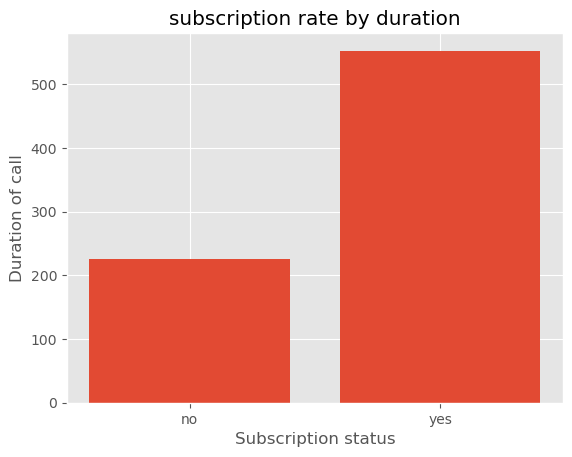

In [205]:
plt.bar(subscription_duration.index, subscription_duration.values)
plt.title("subscription rate by duration")
plt.xlabel('Subscription status')
plt.ylabel('Duration of call');

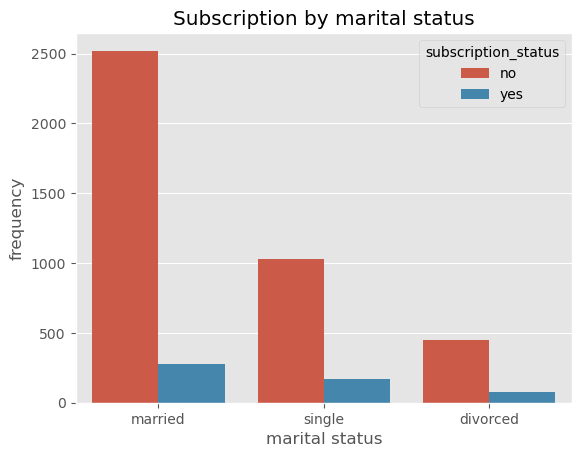

In [207]:
sb.countplot(data= bank_data, x='marital', hue='y')
plt.title('Subscription by marital status')
plt.xlabel('marital status')
plt.ylabel('frequency')
plt.legend(title='subscription_status');

In [209]:
def plot_countplot(data, col1,col2):
        plt.figure(figsize=[10,8])
        plt.subplot(222)
        sb.countplot(data= data, x=col1, hue=col2)
        plt.title(f'Subscription by {col1}')
        plt.xlabel(col1)
        plt.ylabel('frequency')
        plt.xticks(rotation=90)
        plt.legend(title='subscription_status');

In [211]:
non_number_col= bank_data.select_dtypes('object')

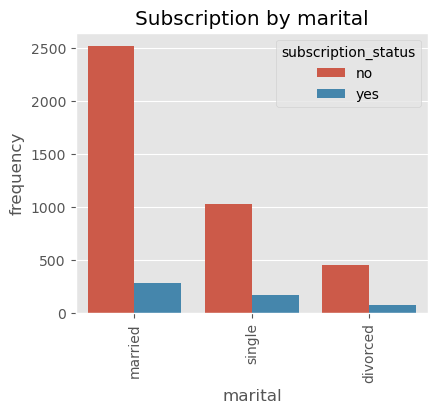

In [213]:
plot_countplot(non_number_col, 'marital','y')

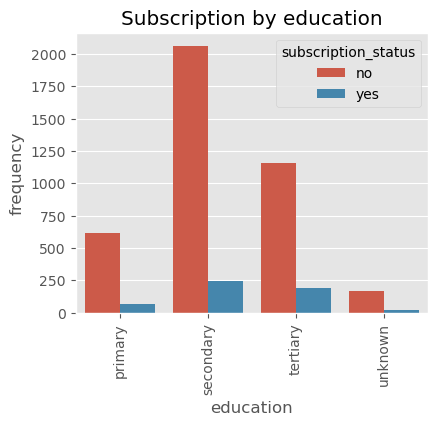

In [215]:
plot_countplot(non_number_col, 'education','y')

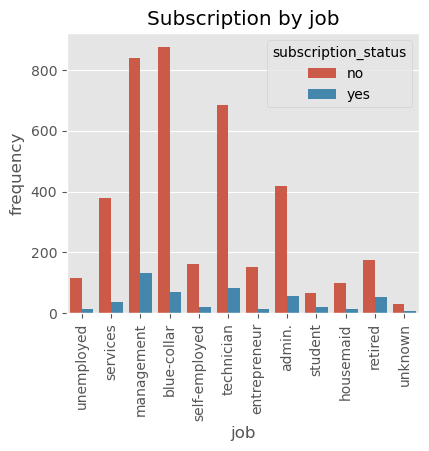

In [217]:
plot_countplot(non_number_col, 'job','y')

In [218]:
bank_data.groupby(['y','job'])['y'].count()

y    job          
no   admin.           420
     blue-collar      877
     entrepreneur     153
     housemaid         98
     management       838
     retired          176
     self-employed    163
     services         379
     student           65
     technician       685
     unemployed       115
     unknown           31
yes  admin.            58
     blue-collar       69
     entrepreneur      15
     housemaid         14
     management       131
     retired           54
     self-employed     20
     services          38
     student           19
     technician        83
     unemployed        13
     unknown            7
Name: y, dtype: int64

In [219]:
bank_data.groupby(['marital','job']).size().unstack().fillna(0)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
marital,,,,,,,,,,,,
divorced,69.0,79.0,16.0,13.0,119.0,43.0,15.0,62.0,0.0,89.0,22.0,1.0
married,266.0,693.0,132.0,84.0,557.0,176.0,127.0,236.0,10.0,411.0,75.0,30.0
single,143.0,174.0,20.0,15.0,293.0,11.0,41.0,119.0,74.0,268.0,31.0,7.0


In [220]:
def plot_box(data,col, col2):
    plt.figure(figsize=[8,5])
    sb.boxenplot(data, x=str(col), y=col2, hue='y')
    plt.title(f'Distribution of {col} by subscription')
    plt.xlabel(col)
    plt.ylabel(col2)
    plt.xticks(rotation=90)
    plt.legend(title='subscription status',loc='upper right')

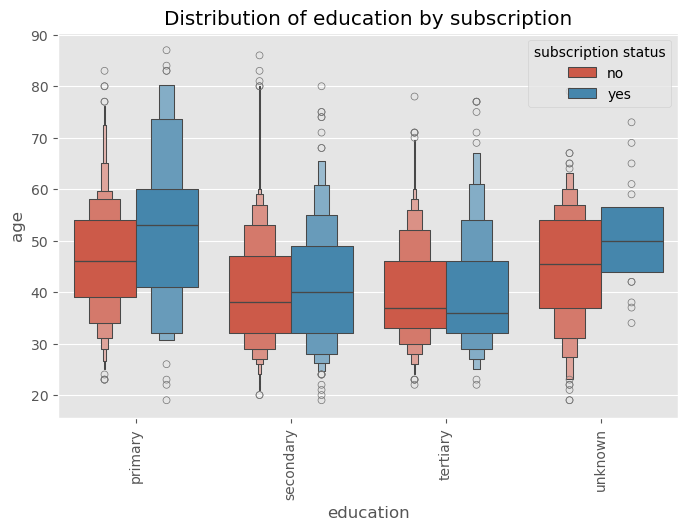

In [225]:
plot_box(bank_data, 'education','age')

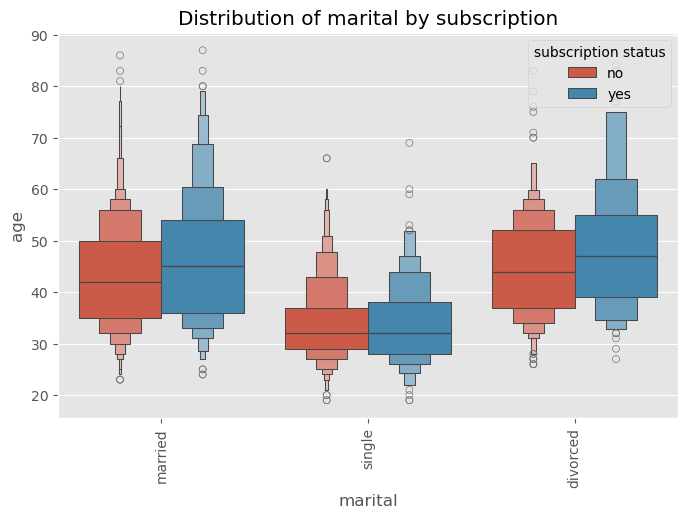

In [227]:
plot_box(bank_data, 'marital', 'age')

In [43]:
bank_data.groupby(['y','marital'])['age'].mean()

y    marital 
no   divorced    44.864745
     married     43.172222
     single      33.978620
yes  divorced    49.051948
     married     46.021661
     single      33.610778
Name: age, dtype: float64

In [45]:
bank_data.groupby(['y','marital']).size()

y    marital 
no   divorced     451
     married     2520
     single      1029
yes  divorced      77
     married      277
     single       167
dtype: int64

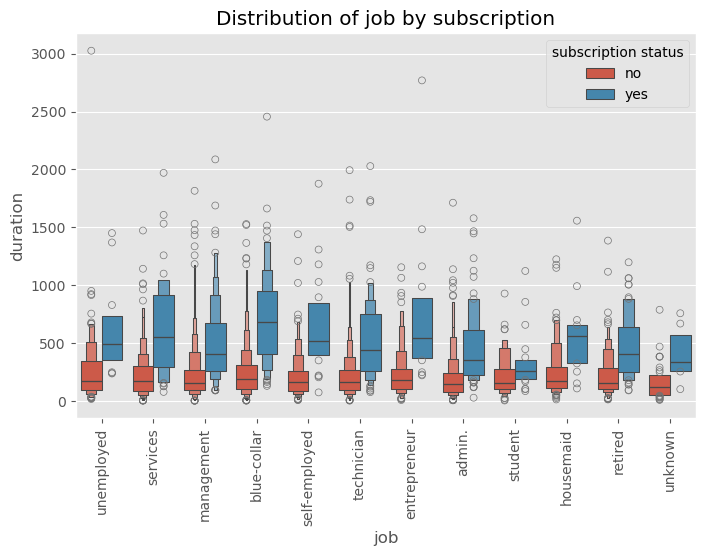

In [229]:
plot_box(bank_data, 'job','duration')

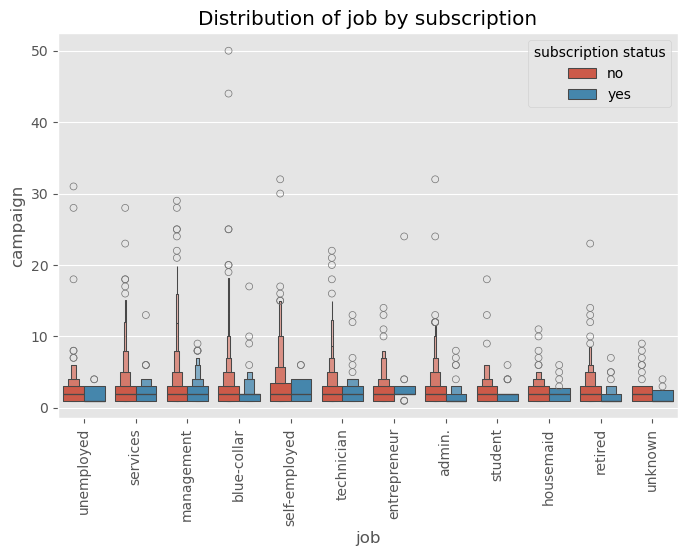

In [231]:
plot_box(bank_data, 'job','campaign')

In [233]:
q1=bank_data['age'].quantile(0.25)
q3=bank_data['age'].quantile(0.75)
iqr=q3-q1
lower_limit, upper_limit=q1-1.5*iqr, q3+1.5*iqr
outliers=bank_data.loc[(bank_data['age']<lower_limit)|(bank_data['age']>upper_limit)]['age']
len(outliers)

38

In [235]:
### Check outliers
def check_outliers(data, col):
    # total_outlier=[]
    # for col in data.select_dtypes('number').columns.tolist():
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    iqr=q3-q1
    lower_limit, upper_limit=q1-1.5*iqr, q3+1.5*iqr
    outliers=data.loc[(data[col]<lower_limit)|(data[col]>upper_limit)]
    total_outlier=len(outliers)
        #total_outlier[col]=len(outliers)
    return total_outlier
features_col=bank_data.select_dtypes('number')
feat_list=[]
for cols in features_col.columns:
    total_outlier=check_outliers(data=features_col,col=cols)
    feat_list.append(total_outlier)
    print(f'The total outlier in {cols} is {total_outlier}')

The total outlier in age is 38
The total outlier in balance is 506
The total outlier in day is 0
The total outlier in duration is 330
The total outlier in campaign is 318
The total outlier in pdays is 816
The total outlier in previous is 816


In [237]:
bank_copy=bank_data.copy()

In [239]:
cat_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [241]:
def encoding_dis(data, cols):
    for col in cols:
        # identifying the data point
        value=data[col].value_counts().sort_index().index
        print(f'label encoding of {col}')
        for i in range(len(value)):
            print(f'{value[i]}:{i}')
        print('_'*30)

In [243]:
#encoding_dis(data=bank_data, cols=cat_col)

### Data Preprocessing
1. Convert all the categorical values to number
2. Nomarlize the numerical column with standard scaler

In [246]:
# label encoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [67]:
# Classified calender month in an ordinal manner
bank_copy['month']=bank_copy['month'].map({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,
                                           'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})

In [70]:
#use labelencoding to transform categories to numerical
bank_copy['job']=encoder.fit_transform(bank_copy['job'])
bank_copy['marital']=encoder.fit_transform(bank_copy['marital'])
bank_copy['education']=encoder.fit_transform(bank_copy['education'])
bank_copy['default']=encoder.fit_transform(bank_copy['default'])
bank_copy['housing']=encoder.fit_transform(bank_copy['housing'])
bank_copy['loan']=encoder.fit_transform(bank_copy['loan'])
bank_copy['contact']=encoder.fit_transform(bank_copy['contact'])
bank_copy['poutcome']=encoder.fit_transform(bank_copy['poutcome'])
bank_copy['y']=encoder.fit_transform(bank_copy['y'])

In [71]:
# dictionary of the categories and their respective numerical/encoded value
job_dict=dict(zip(bank_copy['job'].unique(), bank_data['job'].unique()))
marital_dict=dict(zip(bank_copy['marital'].unique(), bank_data['marital'].unique()))
education_dict=dict(zip(bank_copy['education'].unique(), bank_data['education'].unique()))
default_dict=dict(zip(bank_copy['default'].unique(), bank_data['default'].unique()))
housing_dict=dict(zip(bank_copy['housing'].unique(), bank_data['housing'].unique()))
loan_dict=dict(zip(bank_copy['loan'].unique(), bank_data['loan'].unique()))
contact_dict=dict(zip(bank_copy['contact'].unique(), bank_data['contact'].unique()))
month_dict=dict(zip(bank_copy['month'].unique(), bank_data['month'].unique()))
subscribtion_dict=dict(zip(bank_copy['y'].unique(), bank_data['y'].unique()))

In [72]:
job_dict
marital_dict
education_dict


{0: 'primary', 1: 'secondary', 2: 'tertiary', 3: 'unknown'}

#### Read the transformed data

In [79]:
bank_copy.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,5,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,4,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,5,226,1,-1,0,3,0


## Normalize and Over sample the dataset:
In order to attain better model accuracy, it is adviseable to use standardscaler to normalize the dataset to handle the outliers in the dataset
and   while observing the EDA RESULT it is clearly shown that the dataset is imbalance, so it adviceable to oversample the dataset to handle the imbalance, using RandomOverSampler

In [86]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [90]:
numerical_col=bank_data.select_dtypes('number').columns

In [92]:
numerical_col

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [93]:
# # normalize the dataset using standardscaler
# def standardize(data,col):
#     scaler=StandardScaler()
#     data[col]=scaler.fit_transform(data[col])
#     return data



In [95]:
# bank_copy=standardize(data=bank_copy,col=numerical_col)
# bank_copy.head()

In [100]:
# USE Random Oversampling to handle the imbalance


In [172]:
data_scale=StandardScaler().fit_transform(bank_copy)
data_scale[:,[3,4]]

array([[-1.64475535, -0.1307588 ],
       [-0.30903792, -0.1307588 ],
       [ 1.02667951, -0.1307588 ],
       ...,
       [-0.30903792, -0.1307588 ],
       [-0.30903792, -0.1307588 ],
       [ 1.02667951, -0.1307588 ]])

In [174]:
data_scale.ndim

2

In [102]:
y=bank_copy['y']
X= bank_copy.drop('y', axis=1)

In [104]:
over_sampler=RandomOverSampler()
X_sample,Y_sample=over_sampler.fit_resample(X,y)

#### Split the sampled data into train and test

In [107]:
from sklearn.model_selection import train_test_split

In [109]:
x_train,x_test,y_train,y_test=train_test_split(X_sample,Y_sample, test_size=0.20,random_state=42)

In [111]:
#confirm the train and the test data shape
print(f'The shape of the xtrain data is {x_train.shape}')
print(f'The shape of the xtest data is {x_test.shape}')
print(f'The shape of the ytrain data is {y_train.shape}')
print(f'The shape of the ytest data is {y_test.shape}')

The shape of the xtrain data is (6400, 16)
The shape of the xtest data is (1600, 16)
The shape of the ytrain data is (6400,)
The shape of the ytest data is (1600,)


1467    1
5768    1
5714    1
1578    0
6958    1
Name: y, dtype: int32

### Train your model

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report,confusion_matrix

In [116]:
# create a dictionary that contains all the model
model_dict={'Logistic_Regressor':LogisticRegression(),
           'Random_Forestclassifier':RandomForestClassifier(),
           'Decision_Tree':DecisionTreeClassifier(),
           'Knn':KNeighborsClassifier()}

In [118]:
### WRITE A FUNCTION TO CHECK FOR MODEL ACCURACY
def check_best_model(model, xtrain,ytrain,xtest,ytest):
    """
    model-the model from the model_dict dictionary
    xtrain- x data to train
    ytrain- label or target variable
    xtest- x data to test the model
    ytest- label target variable for testing
       
    """
    train_scores=[]
    test_scores=[]
    names=[]
    for name,model in model_dict.items():
        model.fit(xtrain,ytrain)
        train_score=model.score(xtrain,ytrain)
        train_scores.append(train_score)
        test_score=model.score(xtest,ytest)
        test_scores.append(test_score)
        names.append(name)
        df=pd.DataFrame({'Model Name':names,
                        'Train Score':train_scores,
                        'Test Score':test_scores})
    return df

In [120]:
%%time
scores=check_best_model(model_dict, x_train,y_train,x_test,y_test)
scores

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CPU times: total: 5.78 s
Wall time: 7.75 s


,Model Name,Train Score,Test Score
0,Logistic_Regressor,0.753594,0.751875
1,Random_Forestclassifier,1.000000,0.978750
2,Decision_Tree,1.000000,0.961250
3,Knn,0.912969,0.888125


### Model selection
From the table above it is observed that RandomForest classifiers tend to perform better compares to other model used in training the dataset with 97% test accuracy and 100% train accuracy. Logistic Regression is a no go area in training this model due to it poor performance

In [122]:
model=RandomForestClassifier()

In [123]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [124]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 1])

In [127]:
def compare_predict(y_true,y_pred):
    result=pd.DataFrame()
    result['y_true']=y_true
    result['y_pred']=y_pred
    return result

result=compare_predict(y_true=y_test,y_pred=y_pred)

In [131]:
result.head()

,y_true,y_pred
2215,0,0
2582,0,0
1662,0,0
3027,1,1
4343,0,0


In [133]:
yes=bank_data.loc[bank_data['y']=='yes']
yes.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
13,20,student,single,secondary,no,502,no,no,cellular,30,apr,261,1,-1,0,unknown,yes


In [135]:
yes=bank_copy.loc[bank_copy['y']==0]
yes.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0


In [137]:
bank_copy.iloc[3027]

age           40
job            4
marital        1
education      2
default        0
balance        0
housing        0
loan           0
contact        0
day           10
month         11
duration     147
campaign       1
pdays         96
previous       8
poutcome       2
y              1
Name: 3027, dtype: int64

In [139]:
# scaler=StandardScaler()

In [141]:
no_val=np.array([[30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3]])

In [143]:
val=np.array([[40,4,1,2,0,0,0,0,0,10,11,147,1,96,8,2]])

In [145]:
input_=np.array([[20,8,2,1,0,502,0,0,0,30,4,261,1,-1,0,3]])
# input_[:,[0,5,9,11,13,14]]=scaler.fit_transform(input_[:,[0,5,9,11,13,14]])
# input_[:,[0,5,9,11,13,14]]

In [147]:
model.predict(no_val)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

#### Model evaluation using classification report and confusion matrix

In [150]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[762,  39],
       [  0, 799]], dtype=int64)

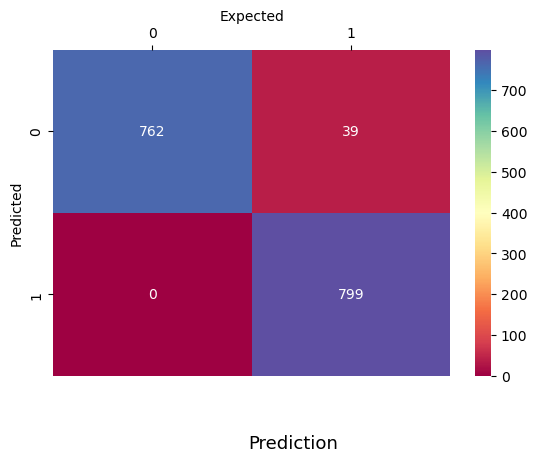

In [152]:
sb.heatmap(cm,cmap='Spectral',annot=True,fmt='g')
plt.xlabel('Expected')
plt.ylabel('Predicted')
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5,0.05,'Prediction',ha='center',fontsize=13)
plt.show();

In [154]:
subscribtion_dict

{0: 'no', 1: 'yes'}

In [156]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       801
           1       0.95      1.00      0.98       799

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600



In [158]:
import pickle

In [161]:
random_model=open('random_model.pickle', 'wb')
pickle.dump(model,random_model)
random_model.close()

In [163]:
load_mode=open('random_model.pickle','rb')
model=pickle.load(load_mode)
model

RandomForestClassifier()

In [454]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [456]:
numerical_col

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [458]:
job_dict_reverse=dict(zip(bank_data['job'].unique(), bank_copy['job'].unique()))
marital_dict_reverse=dict(zip(bank_data['marital'].unique(), bank_copy['marital'].unique()))
education_dict_reverse=dict(zip(bank_data['education'].unique(), bank_copy['education'].unique()))
default_dict_reverse=dict(zip(bank_data['default'].unique(), bank_copy['default'].unique()))
housing_dict_reverse=dict(zip(bank_data['housing'].unique(), bank_copy['housing'].unique()))
loan_dict_reverse=dict(zip(bank_data['loan'].unique(), bank_copy['loan'].unique()))
contact_dict_reverse=dict(zip(bank_data['contact'].unique(), bank_copy['contact'].unique()))
month_dict_reverse=dict(zip(bank_data['month'].unique(), bank_copy['month'].unique()))
poutcome_dict_reverse=dict(zip(bank_data['poutcome'].unique(), bank_copy['poutcome'].unique()))
# subscribtion_dict=dict(zip(bank_copy['y'].unique(), bank_data['y'].unique()))

In [460]:
poutcome_dict_reverse

{'unknown': 3, 'failure': 0, 'other': 1, 'success': 2}

In [506]:
def predict_subscription():
    age=int(input('Enter Age: '))
    balance=int(input('Enter Balance: '))
    day=int(input('Enter day: '))
    duration=int(input('Enter duration: '))
    campaign=int(input('Enter campaign: '))
    pday=int(input('Enter pday: '))
    previuos=int(input('Enter previous: '))
    try:
        job=int(input('Enter job: ').lower())
        marital=int(input('Enter marital: ').lower())
        education=int(input('Enter education: ').lower())
        default=int(input('Enter default: ').lower())
        housing=int(input('Enter housing: ').lower())
        loan=int(input('Enter loan: ').lower())
        contact=int(input('Enter contact: ').lower())
        month=int(input('Enter month: ').lower())
        poutcome=int(input('Enter poutcome: ').lower())
    except Exception:
        return print('Please enter valid information')
    else:
        job=job_dict_reverse.get(job,0)
        marital=marital_dict_reverse.get(marital,0)
        education=education_dict_reverse.get(education,0)
        default=default_dict_reverse.get(default,0)
        housing=housing_dict_reverse.get(housing,0)
        loan=loan_dict_reverse.get(loan,0)
        contact=contact_dict_reverse.get(contact,0)
        month=month_dict_reverse.get(month, 0)
        poutcome=poutcome_dict_reverse.get(poutcome,0)

        # Enclose User input into array
        
        user_input=np.array([
            [
                age, job, marital, education, default, balance, housing,
                loan, contact, day, month, duration, campaign, pday,previuos, poutcome
            ]
        ])
        print(user_input)
        # scaler=StandardScaler()
        # user_input[:,[0,5,9,11,13,14]]=scaler.fit_transform(user_input[:,[0,5,9,11,13,14]])

        probability=model.predict_proba(user_input)[0][1]*100
        prediction=model.predict(user_input)

        print(f'The probability of customer subscribing is {probability:.1f}%')
        print(f'The prediction of customer subscribing is {prediction}')

predict_subscription()
        

Enter Age:  40
Enter Balance:  0
Enter day:  5
Enter duration:  65
Enter campaign:  1
Enter pday:  45
Enter previous:  2
Enter job:  4
Enter marital:  2
Enter education:  3
Enter default:  0
Enter housing:  2
Enter loan:  1
Enter contact:  3
Enter month:  12
Enter poutcome:  3


[[40  0  0  0  0  0  0  0  0  5  0 65  1 45  2  0]]
The probability of customer subscribing is 17.0%
The prediction of customer subscribing is [0]


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [492]:
def predict_value(user_input_value):
    user_input=np.array(user_input_value)
    # predict model
    predicted=model.predict(user_input)
    # customizeed result yes_subscription and no_subscription
    if predicted[0]==1:
        print('yes subscription')
    else:
        print('No subscription')


In [494]:
predict_value([[40,4,1,2,0,0,0,0,0,10,11,147,1,96,8,2]])

yes subscription


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [496]:
predict_value([[30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3]])

No subscription


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [527]:
jobs=int(input('Enter job: ').lower())

Enter job:  6


In [539]:
jobs=int(input('Enter job: ').lower())
for value in job_dict_reverse.values():
    if value==jobs:
        jobs=value
print(jobs)
        

Enter job:  5


5


In [541]:
l=[job_dict_reverse,marital_dict_reverse,education_dict_reverse]
result=[]
for ele in l:
    for i in ele.values():
        if 

10
7
4
1
6
9
2
0
8
3
5
11
1
2
0
0
1
2
3


In [531]:
job

In [13]:

def load_model():
    with open('random_model.pickle','rb')as file:
        model=pickle.load(file)
        return model

In [15]:
model=load_model()

In [17]:
model

RandomForestClassifier()